In [1]:
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
data= pandas.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", parse_dates=['Date'])
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Rating average/count by Year

In [2]:
data['Year']= data['Date'].dt.year
data.head()
day_average = data.groupby(['Year']).mean()

day_average.head()

,Aboard,Fatalities,Ground
Year,,,
1908,2.0,1.0,0.0
1912,5.0,5.0,0.0
1913,17.0,15.0,0.0
1915,30.0,20.0,0.0
1916,21.8,21.6,0.0


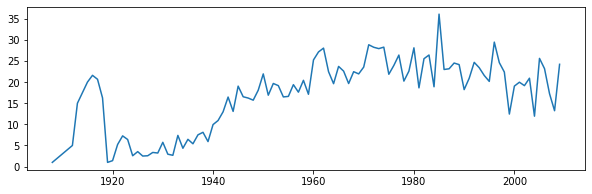

In [3]:
plt.figure(figsize=(10, 3))
plt.plot(day_average.index, day_average["Fatalities"])

In [4]:
day_average['Fatalities'].max()

36.08108108108108

### Rating average by Month

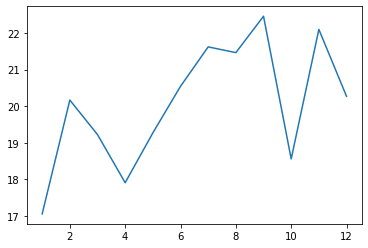

In [5]:
data['Month'] = data['Date'].dt.month
month_average = data.groupby(['Month']).mean()
plt.plot(month_average.index, month_average['Fatalities'])

### Rating average by Weekday

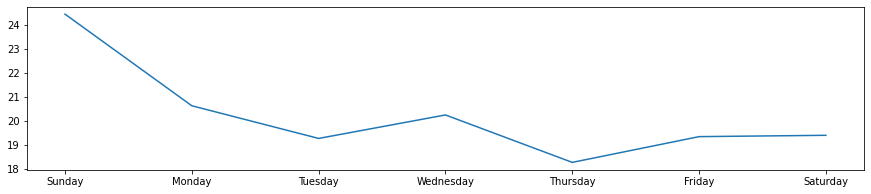

In [6]:
data['Weekday'] = data['Date'].dt.strftime('%A')
data['Daynumber'] = data['Date'].dt.strftime('%w')


weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()

weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize=[15,3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Fatalities'])

In [7]:
share = data.groupby(['Operator'])['Fatalities'].mean()
share

Operator
A B Aerotransport                 1.500000
AB Aerotransport                 19.333333
ACES Colombia                    13.333333
ADC Airlines                     48.500000
ADES Colombia                    11.000000
                                   ...    
Zantop Air Transport              3.250000
Zantop Airways                    2.000000
Zantop International Airlines     4.000000
Zen Nippon                        2.000000
de Havilland Aircraft            11.000000
Name: Fatalities, Length: 2476, dtype: float64

In [17]:
data['Type']


0                       Wright Flyer III
1                              Dirigible
2                       Curtiss seaplane
3                 Zeppelin L-1 (airship)
4                 Zeppelin L-2 (airship)
                      ...               
5263             Lockheed C-130 Hercules
5264                       Antonov An-26
5265                     Airbus A330-203
5266    Britten-Norman BN-2A-27 Islander
5267                       Antonov An-32
Name: Type, Length: 5268, dtype: object

In [20]:
data['Month'] = data['Date'].dt.month
month_average = data.groupby(['Month']).mean()
plt.plot(month_average.index, month_average['Fatalities'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'round'